In [1]:
%matplotlib inline

# Processing time with `pandas`

Let's open up some data from [the Census bureau](https://www.census.gov/econ/currentdata/datasets/) - we're going to use **New Home Sales**. The data is formatted... oddly, so I've cleaned it up for you as **home-sales.csv** inside of the **data** folder.

Open it **without moving it**. Tab autocomplete will help you.

In [5]:
import pandas as pd

In [9]:
df = pd.read_csv("data/home-sales.csv")

## Creating a datetime column

In [10]:
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01


In [11]:
df.tail()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
636,0,39.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-01-01
637,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-02-01
638,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-03-01
639,0,57.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-04-01
640,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2016-05-01


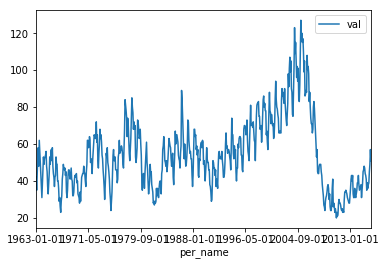

In [12]:
df.plot(x='per_name', y='val')

## Changing the index to the datetime

Normally the index of the column is just a number.

In [14]:
df.per_name.head()

0    1963-01-01
1    1963-02-01
2    1963-03-01
3    1963-04-01
4    1963-05-01
Name: per_name, dtype: object

It's the column on the far left - `0`, `1`, `2`, `3`, `4`... boring and useless! If we use **.set_index** to replace the index with the datetime, though, we can start to have some fun

In [20]:
%%time
pd.to_datetime(df.per_name, format="%Y-%m-%d").head()

CPU times: user 659 µs, sys: 11 µs, total: 670 µs
Wall time: 678 µs


0   1963-01-01
1   1963-02-01
2   1963-03-01
3   1963-04-01
4   1963-05-01
Name: per_name, dtype: datetime64[ns]

In [21]:
df['date'] = pd.to_datetime(pd.to_datetime(df.per_name, format="%Y-%m-%d"))
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name,date
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01,1963-05-01


In [22]:
df.dtypes


is_adj                 int64
val                  float64
cat_code              object
cat_desc              object
cat_indent             int64
dt_code               object
dt_desc               object
dt_unit               object
geo_code              object
geo_desc              object
per_name              object
date          datetime64[ns]
dtype: object

In [25]:
df.set_index('date', inplace=True)

In [24]:
df.head()

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name,date
0,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-01-01,1963-01-01
1,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01,1963-02-01
2,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-03-01,1963-03-01
3,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-04-01,1963-04-01
4,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01,1963-05-01


Be sure you use `inplace=True` or else it won't save the new index!

## Selecting specific(-ish) dates via the index

Now that our index is a datetime, we can select date ranges super super easily.

### Selecting by month

### Selecting by year

In [26]:
df['1975']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1975-01-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-01-01
1975-02-01,0,34.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-02-01
1975-03-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-03-01
1975-04-01,0,54.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-04-01
1975-05-01,0,57.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-05-01
1975-06-01,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-06-01
1975-07-01,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-07-01
1975-08-01,0,53.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-08-01
1975-09-01,0,46.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1975-09-01


## List slices with datetimes

We can also use **list slicing** with datetimes! Usually we would say things like `df10

Just for review, you can use `:` to only select certain parts of a list:

In [27]:
# Make our list of fruits
ranked_fruits = ('banana', 'orange', 'apple', 'blueberries', 'strawberries')

In [28]:
# Start from the beginning, get the first two
ranked_fruits[:2]

('banana', 'orange')

In [29]:
# Start from two, get up until the fourth element
ranked_fruits[2:4]

('apple', 'blueberries')

In [30]:
# Starting from the third element, get all the rest
ranked_fruits[3:]

('blueberries', 'strawberries')

Instead of using boring ol' numbers, we can use **dates instead**.

### Getting rows after a certain date

In [32]:
df['1970':]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1970-01-01,0,34.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-01-01
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01
1970-04-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-04-01
1970-05-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-05-01
1970-06-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-06-01
1970-07-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-07-01
1970-08-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-08-01
1970-09-01,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-09-01


### Getting rows between a certain date

In [33]:
df['1970':'1975']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1970-01-01,0,34.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-01-01
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01
1970-04-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-04-01
1970-05-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-05-01
1970-06-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-06-01
1970-07-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-07-01
1970-08-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-08-01
1970-09-01,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-09-01


In [34]:
df['1970-02':'1975-07']

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1970-03-01,0,36.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-03-01
1970-04-01,0,42.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-04-01
1970-05-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-05-01
1970-06-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-06-01
1970-07-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-07-01
1970-08-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-08-01
1970-09-01,0,45.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-09-01
1970-10-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-10-01


In [41]:
df['1970':'1979'].val.sum()

6557.0

In [42]:
df['1980':'1989'].val.sum()

6088.0

# How do we select every February 

In [46]:
df.per_name.str.contains["-02-"]

TypeError: 'method' object is not subscriptable

In [50]:
df[df.index.month == 2]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-02-01,0,35.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-02-01
1964-02-01,0,46.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-02-01
1965-02-01,0,44.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-02-01
1966-02-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1966-02-01
1967-02-01,0,32.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1967-02-01
1968-02-01,0,43.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1968-02-01
1969-02-01,0,40.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1969-02-01
1970-02-01,0,29.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1970-02-01
1971-02-01,0,49.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1971-02-01


In [51]:
#OR

df[df.index.month.isin([5,6,7])]

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
1963-05-01,0,58.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-05-01
1963-06-01,0,48.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-06-01
1963-07-01,0,62.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1963-07-01
1964-05-01,0,52.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-05-01
1964-06-01,0,53.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-06-01
1964-07-01,0,54.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1964-07-01
1965-05-01,0,54.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-05-01
1965-06-01,0,57.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-06-01
1965-07-01,0,51.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1965-07-01


# Info on our time series

If you try to `.plot`, pandas will automatically use the index (the date) as the x axis for you. This makes like **perfect.** because you don't have to think about anything, and calculations automatically have a good axis.

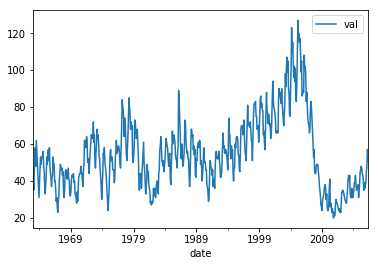

In [52]:
df.plot(y='val')

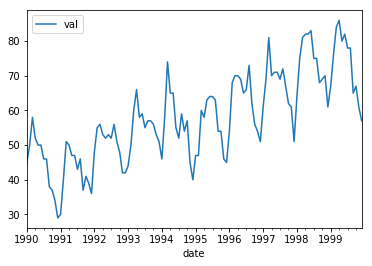

In [53]:
df['1990':'1999'].plot(y='val') #Good one

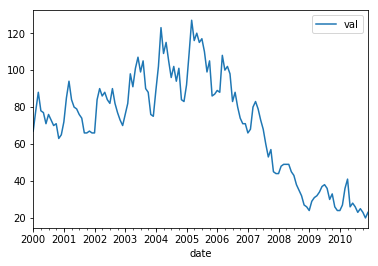

In [54]:
df['2000':'2010'].plot(y='val') #Good one

## Grouping with resample, not with groupby

Hmmm, looks like something bad might have happened to the housing industry t some point. Maybe we want to see some numbers instead of a graph? To do aggregate statistics on time series in pandas we use a method called `.resample()`, and we're going to tell it **to group the data by year.**

When we tell it to group by year, we need to give it a **special code**. I always get mine from this StackOverflow post http://stackoverflow.com/a/17001474 because it's much more convenient than the pandas documentation.

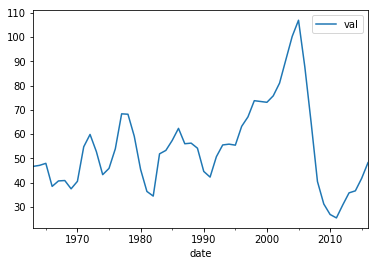

In [56]:
df.resample('A').mean().plot(y='val')

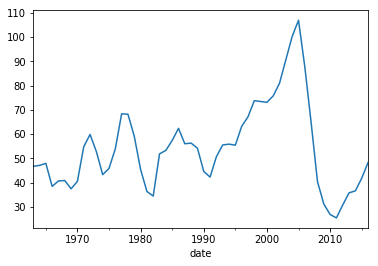

In [57]:
df['val'].resample('A').mean().plot()

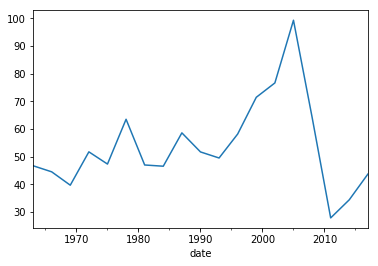

In [58]:
df['val'].resample('3A').mean().plot()  #for 3 years ticks

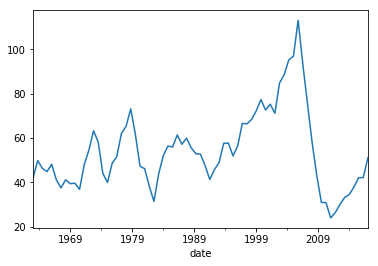

In [59]:
df['val'].resample('9M').mean().plot()  #for 9month ticks

Notice that it's **December of every year**. That still looks like too much data, though. What if we back out to every decade?

Cool, right?

### Graphing

We can graph these instead of just look at them! Get ready!

In [61]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

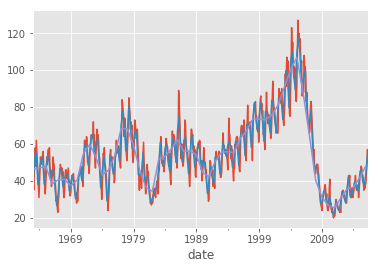

In [64]:
ax = df['val'].plot()
df['val'].resample('Q').mean().plot()
df['val'].resample('A').mean().plot()

### Graphing all on one plot

We've done this before, but it's more exciting now - save the first plot as `ax` and pass it to the others as the confusingly- or conveniently-named `ax=ax`.

## Cyclical data (actually using groupby)

### What were the top 5 worst months?

In [65]:
df.sort_values(by='val')

,is_adj,val,cat_code,cat_desc,cat_indent,dt_code,dt_desc,dt_unit,geo_code,geo_desc,per_name
date,,,,,,,,,,,
2010-11-01,0,20.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-11-01
2011-01-01,0,21.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-01-01
2011-02-01,0,22.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-02-01
2010-08-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-08-01
2010-10-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-10-01
2011-11-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2011-11-01
2010-12-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2010-12-01
2012-01-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,2012-01-01
1966-12-01,0,23.0,SOLD,New Single-family Houses Sold,0,TOTAL,All Houses,K,US,United States,1966-12-01


It seems like there might be a cycle ever year. Maybe houses are sold in the summer and not the winter? To do this we can't use resample - it's for putting time into buckets - we need to **group by the month.**

### Getting the month

We can't ask for the index column as "year" any more, but we can just use `df.index` instead.

In [ ]:
df.index.month

In [66]:
df.groupby(by=df.index.month).mean()

,is_adj,val,cat_indent
date,,,
1,0,47.685185,0
2,0,53.592593,0
3,0,62.685185,0
4,0,61.444444,0
5,0,61.129630,0
6,0,59.188679,0
7,0,56.735849,0
8,0,57.566038,0
9,0,52.037736,0


In [67]:
df.groupby(by=df.index.dayofweek).mean()

,is_adj,val,cat_indent
date,,,
0,0,54.086957,0
1,0,54.064516,0
2,0,53.956044,0
3,0,55.611111,0
4,0,53.967391,0
5,0,54.615385,0
6,0,54.173913,0


To get the month of each date, it's simply `df.index.month`.

In [ ]:
df.groupby(by=df.index.month).mean()

### Doing the groupby to view data by month

So when we do our groupby, we'll say **hey, we made the groups for you already**. Then we ask for the median number of houses sold.

### Plot the results

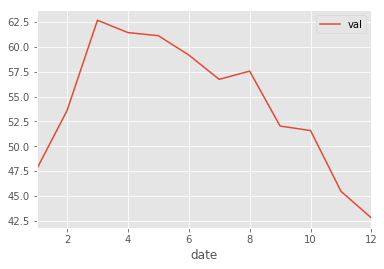

In [68]:
df.groupby(by=df.index.month).mean().plot(y='val')

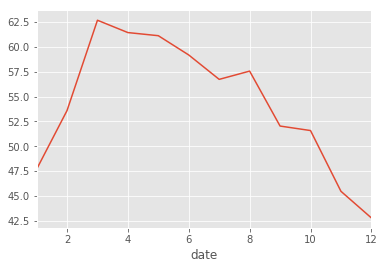

In [71]:
df['val'].groupby(by=df.index.month).mean().plot()

# More details

You can also use **max** and **min** and all of your other aggregate friends with `.resample`. For example, what's the **largest number of houses hold in a given year?**

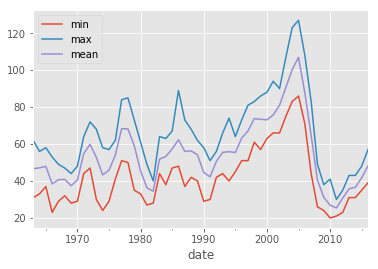

In [76]:
df['val'].resample('A').agg({'min','max','mean'}).plot()

In [72]:
df['val'].resample('A').sum().sort_values(ascending=False)

date
2005-12-31    1283.0
2004-12-31    1203.0
2003-12-31    1088.0
2006-12-31    1052.0
2002-12-31     972.0
2001-12-31     909.0
1998-12-31     885.0
1999-12-31     881.0
2000-12-31     877.0
1977-12-31     820.0
1978-12-31     818.0
1997-12-31     805.0
2007-12-31     776.0
1996-12-31     758.0
1986-12-31     748.0
1972-12-31     718.0
1979-12-31     709.0
1985-12-31     688.0
1988-12-31     675.0
1987-12-31     672.0
1994-12-31     670.0
1993-12-31     666.0
1995-12-31     665.0
1971-12-31     657.0
1989-12-31     650.0
1976-12-31     647.0
1984-12-31     639.0
1973-12-31     633.0
1983-12-31     622.0
1992-12-31     608.0
1965-12-31     575.0
1964-12-31     565.0
1963-12-31     560.0
1975-12-31     550.0
1980-12-31     545.0
1990-12-31     535.0
1974-12-31     519.0
1991-12-31     507.0
2015-12-31     501.0
1968-12-31     490.0
1967-12-31     488.0
1970-12-31     486.0
2008-12-31     485.0
1966-12-31     461.0
1969-12-31     449.0
2014-12-31     439.0
1981-12-31     436.0
2013-12-

How about the fewest?

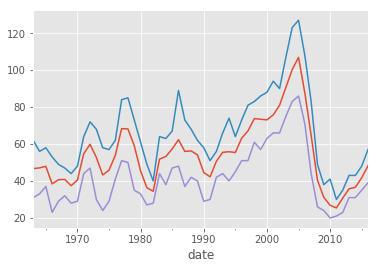

In [74]:
df['val'].resample('A').mean().plot()
df['val'].resample('A').max().plot()
df['val'].resample('A').min().plot()

In [ ]:
df['val'].resample('A').agg({'min','max','mean'}).plot()

Since we're feeling crazy, why don't we plot the **average, max and min for each year?**

In [84]:
#Those are our x values
x_values = df.resample('A').index

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.resample() is now a deferred operation
You called index(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead
  


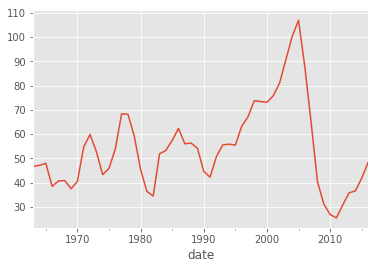

In [87]:
y_maxes= df['val'].resample('A').max()
y_mins = df['val'].resample('A').min()
y_maxes.head()



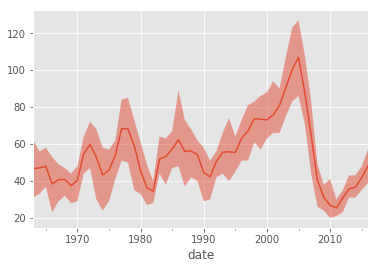

In [93]:
ax = df['val'].resample('A').mean().plot()
ax.fill_between(x_values, y_maxes, y_mins, alpha=0.5)

## Using `.fill_between` to draw between lines

Getting maximums and minimums for years is a very common way of dealing with resampled time series. A fun graph to make is the `fill_between` graph, which colors between two areas.

### Step 1: Calculate the maxes and mins and get a list of x values

`ax.fill_between` requires three things

    - a list of x values (the dates),
    - a list of minimum values for those x values,
    - and a list of maximum values for those x values

### Step 2: Build the graph

### Step 3: Add the fill

`ax.fill_between` requires three things

    - a list of x values
    - a list of minimum values
    - and a list of maximum values

We have all of those, so let's draw it!